In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [59]:
df = pd.read_csv('../data/clean_dataset_Landry.csv')
df.head()

,airline,flight,origin,departure_time,stops,arrival_time,destination,class,duration,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,0,130,71.44
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,0,140,71.44
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,130,71.47
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,0,135,71.46
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,0,140,71.46


In [60]:
df.dtypes

airline            object
flight             object
origin             object
departure_time     object
stops               int64
arrival_time       object
destination        object
class               int64
duration            int64
price             float64
dtype: object

In [61]:
ohe_columns = ['airline', 'origin', 'departure_time', 'arrival_time', 'destination']
ohe_df = pd.get_dummies(df, columns=ohe_columns, prefix=ohe_columns, dtype=int, drop_first=True)

In [62]:
ohe_df.shape

(300153, 30)

In [63]:
X = ohe_df.drop(columns=['flight', 'price'])
y = ohe_df['price']

## Random Forest Regressor

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [65]:
model = RandomForestRegressor(random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [66]:
print(f"Training Score: {model.score(X_train, y_train):.4f}")
print(f"Testing Score: {model.score(X_test, y_test):.4f}")

y_pred = model.predict(X_test)

print(f"RMSE Score: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Training Score: 0.9793
Testing Score: 0.9753
RMSE Score: 42.78234435329501


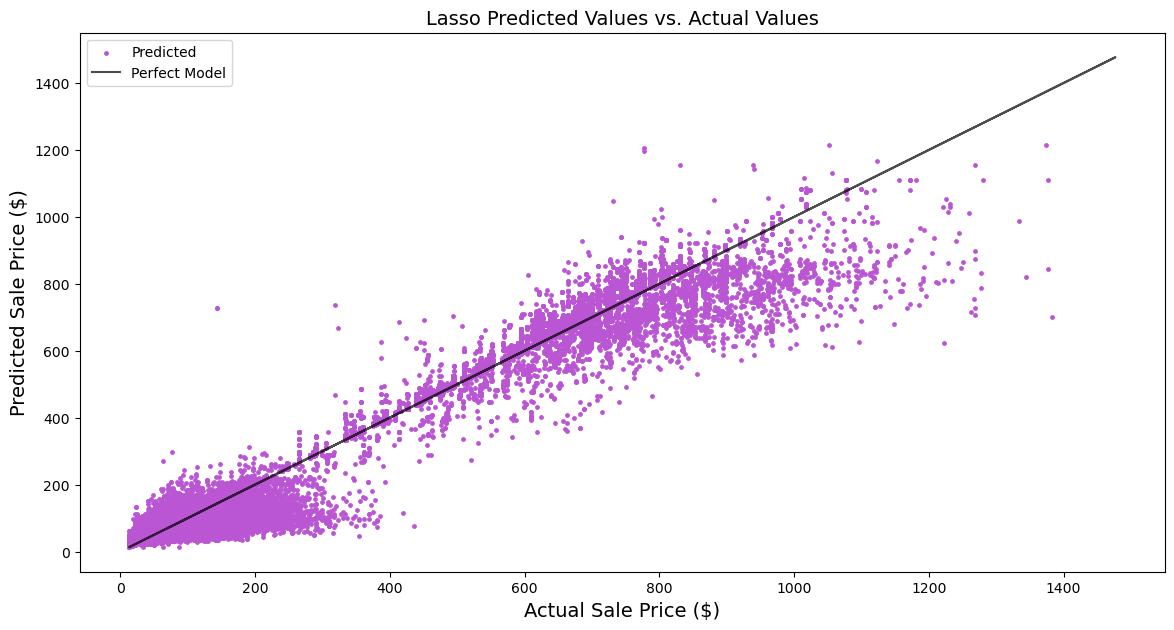

In [67]:
plt.figure(figsize=(14, 7))
plt.scatter(
    y_test,
    y_pred,
    color="MediumOrchid",
    s=6,
    label="Predicted",
)
plt.title("Lasso Predicted Values vs. Actual Values", size=14)
plt.xlabel("Actual Sale Price ($)", size=14)
plt.ylabel("Predicted Sale Price ($)", size=14)
plt.plot(ohe_df["price"], y, color="black", alpha=0.7, label="Perfect Model")
plt.legend(loc="upper left");

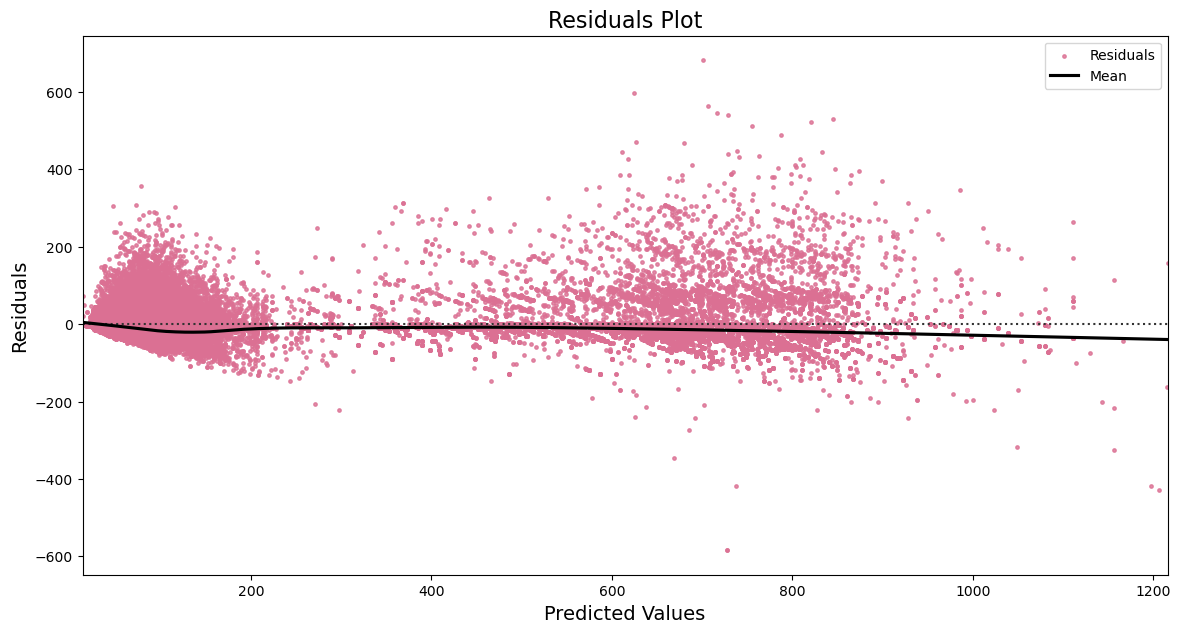

In [68]:
plt.figure(figsize=(14, 7))
sns.residplot(
    x=y_pred,
    y=y_test,
    lowess=True,
    color="PaleVioletRed",
    line_kws=dict(color="black", label="Mean"),
    label="Residuals",
    scatter_kws={"s": 6},
)
plt.title("Residuals Plot", size=16)
plt.xlabel("Predicted Values", size=14)
plt.ylabel("Residuals", size=14)
plt.legend();